In [1]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
from matplotlib.pyplot import *
from glob import glob
import os
import datetime
import pandas as pd
from rasterio_to_xarray import rasterio_to_xarray, xarray_to_rasterio

In [2]:
def maiac_file_to_da(filename):
    da = rasterio_to_xarray(filename)
    
    time_str = os.path.basename(filename)[17:-13]
    time_obj = datetime.datetime.strptime(time_str, '%Y%j%H%M')
    da.coords['time'] = time_obj

    return da

In [6]:
files = glob(r'D:\Annies_Dissertation\Flowminder\March_2014\*.tif')

In [7]:
list_of_das = map(maiac_file_to_da, files)

In [8]:
MAIAC_AOT = xr.concat(list_of_das, 'time')

In [9]:
MAIAC_AOT = MAIAC_AOT.isel(time=np.argsort(MAIAC_AOT.time))

In [10]:
MAIAC_AOT

<xarray.DataArray (time: 36, y: 1162, x: 1240)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  

In [11]:
MAIAC_AOT[1,:,:]

<xarray.DataArray (y: 1162, x: 1240)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
    time     datetime64[ns] 2014-03-19T14:05:00
Attributes:
    crs: +init=epsg:27700
    affine: (-947639.6305106478, 1256.5430440955893, 0.0, 1429277.8120091767, 0.0, -1256.5430440955893)

In [12]:
MAIAC_AOT.time

<xarray.DataArray 'time' (time: 36)>
array(['2014-03-19T12:25:00.000000000', '2014-03-19T14:05:00.000000000',
       '2014-03-19T15:45:00.000000000', '2014-03-20T11:30:00.000000000',
       '2014-03-20T13:10:00.000000000', '2014-03-21T15:30:00.000000000',
       '2014-03-22T11:20:00.000000000', '2014-03-22T13:00:00.000000000',
       '2014-03-22T14:35:00.000000000', '2014-03-23T12:05:00.000000000',
       '2014-03-23T13:40:00.000000000', '2014-03-23T15:20:00.000000000',
       '2014-03-24T12:45:00.000000000', '2014-03-24T14:25:00.000000000',
       '2014-03-25T11:50:00.000000000', '2014-03-25T13:30:00.000000000',
       '2014-03-25T15:05:00.000000000', '2014-03-26T12:35:00.000000000',
       '2014-03-26T14:10:00.000000000', '2014-03-27T11:40:00.000000000',
       '2014-03-27T13:15:00.000000000', '2014-03-27T14:55:00.000000000',
       '2014-03-28T12:20:00.000000000', '2014-03-28T14:00:00.000000000',
       '2014-03-28T15:35:00.000000000', '2014-03-29T11:25:00.000000000',
       '2014-0

In [14]:
Daily_av = MAIAC_AOT.resample('D', dim='time', how='mean')

In [15]:
Daily_av.time

<xarray.DataArray 'time' (time: 14)>
array(['2014-03-19T00:00:00.000000000', '2014-03-20T00:00:00.000000000',
       '2014-03-21T00:00:00.000000000', '2014-03-22T00:00:00.000000000',
       '2014-03-23T00:00:00.000000000', '2014-03-24T00:00:00.000000000',
       '2014-03-25T00:00:00.000000000', '2014-03-26T00:00:00.000000000',
       '2014-03-27T00:00:00.000000000', '2014-03-28T00:00:00.000000000',
       '2014-03-29T00:00:00.000000000', '2014-03-30T00:00:00.000000000',
       '2014-03-31T00:00:00.000000000', '2014-04-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-03-19 2014-03-20 2014-03-21 ...

In [16]:
March19th = Daily_av[0,:,:]
March20th = Daily_av[1,:,:]
March21st = Daily_av[2,:,:]
March22nd = Daily_av[3,:,:]
March23rd = Daily_av[4,:,:]
March24th = Daily_av[5,:,:]
March25th = Daily_av[6,:,:]
March26th = Daily_av[7,:,:]
March27th = Daily_av[8,:,:]
March28th = Daily_av[9,:,:]
March29th = Daily_av[10,:,:]
March30th = Daily_av[11,:,:]
March31st = Daily_av[12,:,:]
April1st = Daily_av[13,:,:]

In [18]:
March19th

<xarray.DataArray (y: 1162, x: 1240)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
    time     datetime64[ns] 2014-03-19
Attributes:
    crs: +init=epsg:27700
    affine: (-947639.6305106478, 1256.5430440955893, 0.0, 1429277.8120091767, 0.0, -1256.5430440955893)

In [19]:
xarray_to_rasterio(March19th, r'D:\Annies_Dissertation\Flowminder\March_2014\March19th.tif')
xarray_to_rasterio(March20th, r'D:\Annies_Dissertation\Flowminder\March_2014\March20th.tif')
xarray_to_rasterio(March21st, r'D:\Annies_Dissertation\Flowminder\March_2014\March21st.tif')
xarray_to_rasterio(March22nd, r'D:\Annies_Dissertation\Flowminder\March_2014\March22nd.tif')
xarray_to_rasterio(March23rd, r'D:\Annies_Dissertation\Flowminder\March_2014\March23rd.tif')
xarray_to_rasterio(March24th, r'D:\Annies_Dissertation\Flowminder\March_2014\March24th.tif')
xarray_to_rasterio(March25th, r'D:\Annies_Dissertation\Flowminder\March_2014\March25th.tif')
xarray_to_rasterio(March26th, r'D:\Annies_Dissertation\Flowminder\March_2014\March26th.tif')
xarray_to_rasterio(March27th, r'D:\Annies_Dissertation\Flowminder\March_2014\March27th.tif')
xarray_to_rasterio(March28th, r'D:\Annies_Dissertation\Flowminder\March_2014\March28th.tif')
xarray_to_rasterio(March29th, r'D:\Annies_Dissertation\Flowminder\March_2014\March29th.tif')
xarray_to_rasterio(March30th, r'D:\Annies_Dissertation\Flowminder\March_2014\March30th.tif')
xarray_to_rasterio(March31st, r'D:\Annies_Dissertation\Flowminder\March_2014\March31st.tif')
xarray_to_rasterio(April1st, r'D:\Annies_Dissertation\Flowminder\March_2014\April1st.tif')

In [20]:
overall_mean = MAIAC_AOT.mean(dim='time', keep_attrs = True)

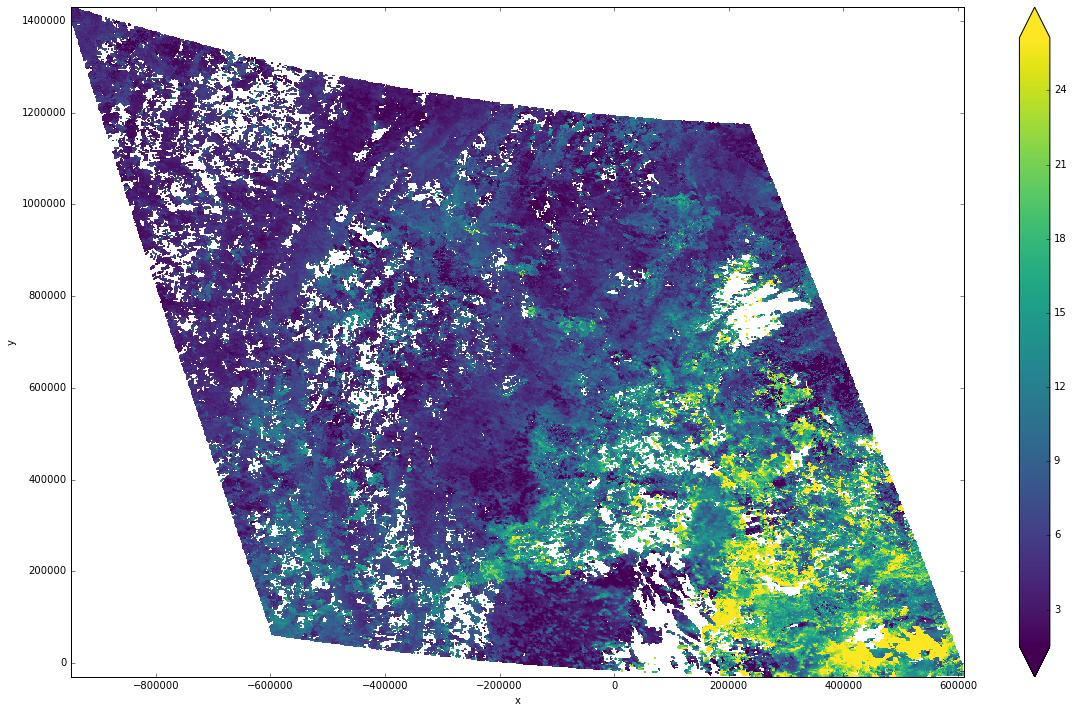

In [21]:
figure(figsize=(20, 12))
overall_mean.plot(robust=True)

In [22]:
xarray_to_rasterio(overall_mean, r'D:\Annies_Dissertation\Flowminder\March_2014\overall_mean.tif')